In [38]:
import tensorflow as tf
import numpy as np

In [2]:
x = tf.ones(shape=(2,1))

In [4]:
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [5]:
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [17]:
x = tf.random.normal(shape=(5,3), mean=0., stddev=1.)

In [18]:
x

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.545639  ,  1.8563126 ,  1.2469662 ],
       [-1.6111617 , -0.77542084, -0.43034008],
       [-0.6214951 , -0.45667446, -0.4422186 ],
       [ 0.04909378, -1.0573589 ,  0.5400891 ],
       [ 0.5394951 , -1.2838374 , -3.232286  ]], dtype=float32)>

In [23]:
x=0

In [24]:
type(x)

int

In [25]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))

In [26]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.3703626 ],
       [ 0.22367981],
       [-1.6498315 ]], dtype=float32)>

In [29]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [32]:
v[1,0].assign(3) 


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [3.],
       [1.]], dtype=float32)>

In [33]:
v.assign_sub(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[0.],
       [2.],
       [0.]], dtype=float32)>

In [34]:
tf.square(v)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.],
       [4.],
       [0.]], dtype=float32)>

In [35]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [36]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

In [37]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [39]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
mean = [0,3],
cov = [[1,0.5], [0.5,1]],
size = num_samples_per_class)

In [40]:
positive_samples = np.random.multivariate_normal(
mean=[3,0],
cov=[[1,0.5], [0.5,1]],
size=num_samples_per_class)

In [41]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [42]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

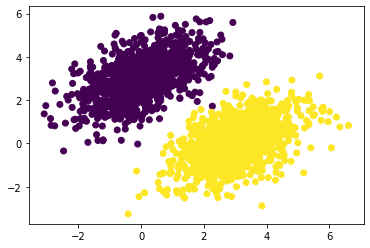

In [43]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:,0])
plt.show()

In [48]:
inputs


array([[ 0.26509264,  1.9410802 ],
       [ 0.82694453,  3.6092777 ],
       [-1.8635316 ,  2.1964412 ],
       ...,
       [ 3.652578  , -1.115289  ],
       [ 4.013505  ,  0.09581816],
       [ 1.6018565 ,  0.6852686 ]], dtype=float32)

In [49]:
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [50]:
negative_samples

array([[ 0.26509265,  1.94108023],
       [ 0.8269445 ,  3.60927766],
       [-1.86353154,  2.19644126],
       ...,
       [-0.02065629,  3.36847607],
       [-1.81867469,  2.30553231],
       [ 1.10395959,  4.40620867]])

In [51]:
input_dim = 2
output_dim =1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

In [52]:
def model(inputs):
    return tf.matmul(inputs, W)+b

In [64]:
def square_loss (targets, predictions):
    per_sample_Losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_Losses)

In [62]:
learning_rate =0.1

def training_step(inputs, outputs):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
        grad_Loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
        W.assign_sub(grad_Loss_wrt_W*learning_rate), b.assign_sub(grad_loss_wrt_b*learning_rate)
        return loss

In [65]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.1660
Loss at step 1: 0.0857
Loss at step 2: 0.0798
Loss at step 3: 0.0749
Loss at step 4: 0.0704
Loss at step 5: 0.0664
Loss at step 6: 0.0627
Loss at step 7: 0.0593
Loss at step 8: 0.0562
Loss at step 9: 0.0534
Loss at step 10: 0.0509
Loss at step 11: 0.0485
Loss at step 12: 0.0464
Loss at step 13: 0.0445
Loss at step 14: 0.0427
Loss at step 15: 0.0411
Loss at step 16: 0.0396
Loss at step 17: 0.0383
Loss at step 18: 0.0370
Loss at step 19: 0.0359
Loss at step 20: 0.0349
Loss at step 21: 0.0340
Loss at step 22: 0.0331
Loss at step 23: 0.0324
Loss at step 24: 0.0317
Loss at step 25: 0.0310
Loss at step 26: 0.0304
Loss at step 27: 0.0299
Loss at step 28: 0.0294
Loss at step 29: 0.0290
Loss at step 30: 0.0286
Loss at step 31: 0.0282
Loss at step 32: 0.0279
Loss at step 33: 0.0276
Loss at step 34: 0.0273
Loss at step 35: 0.0270
Loss at step 36: 0.0268
Loss at step 37: 0.0266
Loss at step 38: 0.0264
Loss at step 39: 0.0262


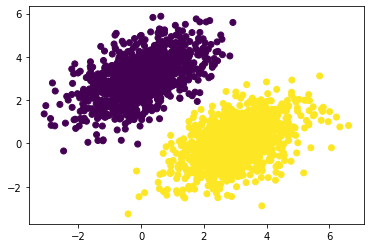

In [66]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

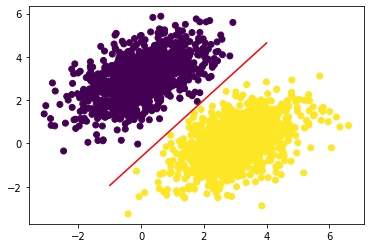

In [68]:
x = np.linspace(-1, 4, 100)                                          
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]                            
plt.plot(x, y, "-r")                                                 
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) 